In [1]:
""" Importing important requirements """
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import pprint

In [2]:
# Load the dataset
def load_dataset(file_path):
    """Load dataset from a JSON file."""
    with open(file_path, 'r') as file:
        return [json.loads(line) for line in file]

In [3]:
# Extract entity and event mentions
def extract_mentions(data):
    """Extract entity and event mentions from the dataset."""
    entity_mentions = []
    event_mentions = []
    for record in data:
        entity_mentions.extend(record.get("entity_mentions", []))
        event_mentions.extend(record.get("event_mentions", []))
    return entity_mentions, event_mentions

In [4]:
# Plotting utility function
def plot_distribution(data, title, xlabel, ylabel, rotation=90, figsize=(10, 6)):
    """Utility function to plot a bar chart for given data."""
    plt.figure(figsize=figsize)
    plt.bar(data.index, data.values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.show()

In [5]:
# Load the dataset
data_path = '/content/full.json'
data = load_dataset(data_path)

# Show the first record with beautiful formatting
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(data[0])

{   'doc_id': 'MACCROBAT_26309459',
    'entity_coreference': [],
    'entity_mentions': [   {   'end': [6],
                               'entity_subtype': 'Age',
                               'entity_type': 'Age',
                               'id': 'MACCROBAT_26309459_0-T1',
                               'mention_type': 'Age',
                               'start': [1],
                               'text': '58-year-old'},
                           {   'end': [7],
                               'entity_subtype': 'Sex',
                               'entity_type': 'Sex',
                               'id': 'MACCROBAT_26309459_0-T2',
                               'mention_type': 'Sex',
                               'start': [6],
                               'text': 'man'},
                           {   'end': [16],
                               'entity_subtype': 'Disease_disorder',
                               'entity_type': 'Disease_disorder',
                       

In [6]:
# Extract mentions
entity_mentions, event_mentions = extract_mentions(data)

print("Entity mentions", entity_mentions[0])
print("___________________________________")
print("Event mentions", event_mentions[0])

Entity mentions {'id': 'MACCROBAT_26309459_0-T1', 'text': '58-year-old', 'entity_type': 'Age', 'mention_type': 'Age', 'entity_subtype': 'Age', 'start': [1], 'end': [6]}
___________________________________
Event mentions {'id': 'MACCROBAT_26309459_0-E1', 'event_type': 'Disease_disorder', 'trigger': {'text': 'hypertension', 'start': [15], 'end': [16]}, 'arguments': [{'entity_id': 'MACCROBAT_26309459_0-T5', 'text': 'poorly controlled', 'role': 'Detailed_description'}]}


In [7]:
len(entity_mentions), len(event_mentions)

(23898, 13128)

In [8]:
# Create DataFrame for entity mentions
entity_df = pd.DataFrame(entity_mentions)
entity_df['entity_type'] = entity_df['entity_type'].astype(str)

entity_df.head()

,id,text,entity_type,mention_type,entity_subtype,start,end
0,MACCROBAT_26309459_0-T1,58-year-old,Age,Age,Age,[1],[6]
1,MACCROBAT_26309459_0-T2,man,Sex,Sex,Sex,[6],[7]
2,MACCROBAT_26309459_0-T3,hypertension,Disease_disorder,Disease_disorder,Disease_disorder,[15],[16]
3,MACCROBAT_26309459_0-T4,hypertension,History,History,History,[15],[16]
4,MACCROBAT_26309459_0-T5,poorly controlled,Detailed_description,Detailed_description,Detailed_description,[13],[15]


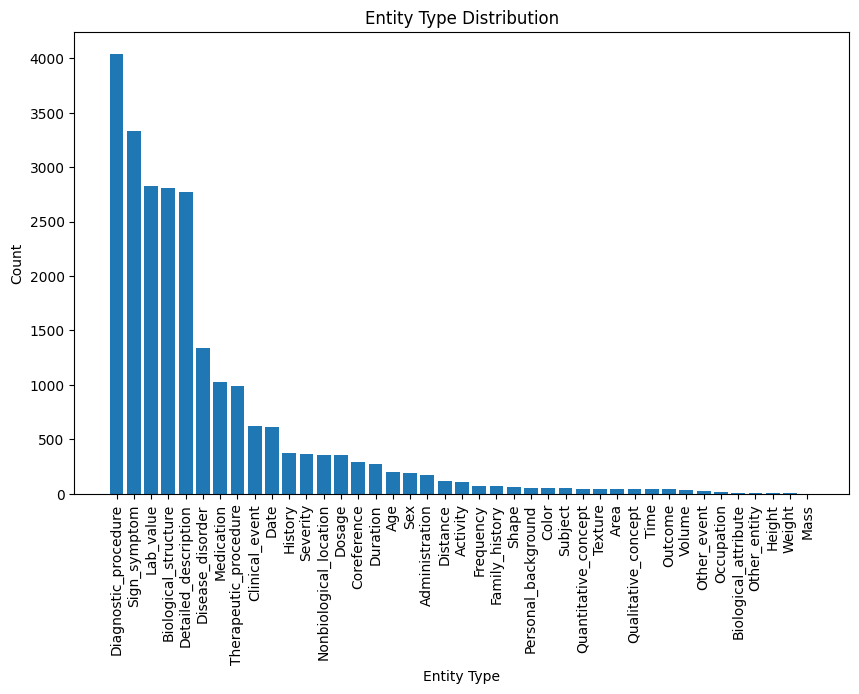

In [9]:
# Analyze and plot entity type distribution
entity_type_counts = entity_df['entity_type'].value_counts()
plot_distribution(entity_type_counts, 'Entity Type Distribution', 'Entity Type', 'Count')

In [15]:
entity_type_counts

,count
entity_type,
Diagnostic_procedure,4039
Sign_symptom,3332
Lab_value,2830
Biological_structure,2806
Detailed_description,2773
Disease_disorder,1335
Medication,1029
Therapeutic_procedure,993
Clinical_event,623


In [10]:
# Display top 10 entity types
print("Top 10 Most Frequent Entity Types:")
print(entity_type_counts.head(10))

Top 10 Most Frequent Entity Types:
entity_type
Diagnostic_procedure     4039
Sign_symptom             3332
Lab_value                2830
Biological_structure     2806
Detailed_description     2773
Disease_disorder         1335
Medication               1029
Therapeutic_procedure     993
Clinical_event            623
Date                      611
Name: count, dtype: int64


In [11]:
len(entity_df['entity_type'].unique())

41

In [16]:
# Create DataFrame for event mentions
event_df = pd.DataFrame(event_mentions)

event_df.head()

,id,event_type,trigger,arguments
0,MACCROBAT_26309459_0-E1,Disease_disorder,"{'text': 'hypertension', 'start': [15], 'end':...","[{'entity_id': 'MACCROBAT_26309459_0-T5', 'tex..."
1,MACCROBAT_26309459_0-E3,Clinical_event,"{'text': 'presented', 'start': [21], 'end': [22]}","[{'entity_id': 'MACCROBAT_26309459_0-T9', 'tex..."
2,MACCROBAT_26309459_0-E5,Disease_disorder,"{'text': 'myocardial infarction', 'start': [31...","[{'entity_id': 'MACCROBAT_26309459_0-T12', 'te..."
3,MACCROBAT_26309459_0-E2,Disease_disorder,"{'text': 'type 2 diabetes', 'start': [17], 'en...",[]
4,MACCROBAT_26309459_0-E4,Disease_disorder,"{'text': 'cardiogenic shock', 'start': [27], '...",[]


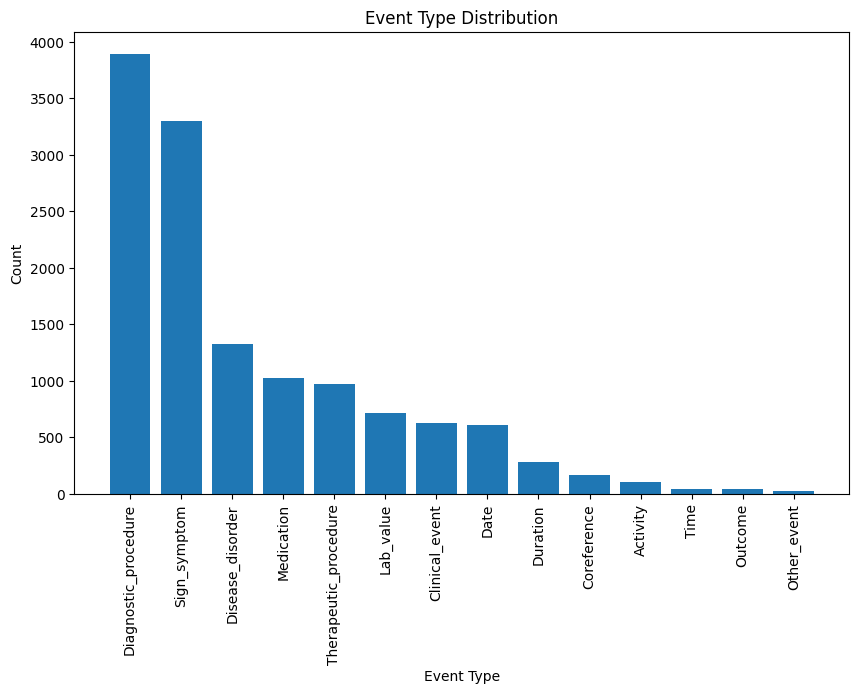

In [17]:
# Analyze and plot event type distribution
event_types = event_df['event_type'].value_counts()
plot_distribution(event_types, 'Event Type Distribution', 'Event Type', 'Count')

In [19]:
len(event_df['event_type'].unique())

14

In [18]:
# Display top 10 event types
print("Top 10 Most Frequent Event Types:")
print(event_types.head(10))

Top 10 Most Frequent Event Types:
event_type
Diagnostic_procedure     3895
Sign_symptom             3304
Disease_disorder         1326
Medication               1023
Therapeutic_procedure     976
Lab_value                 717
Clinical_event            623
Date                      611
Duration                  278
Coreference               164
Name: count, dtype: int64


In [ ]:
# Analyze relationships between entities and events
def analyze_entity_event_relations(event_mentions):
    """Analyze relationships between entities and events."""
    entity_event_relations = []
    for event in event_mentions:
        event_type = event['event_type']
        for argument in event.get('arguments', []):
            entity_event_relations.append((event_type, argument['role']))
    return Counter(entity_event_relations)

relations_counter = analyze_entity_event_relations(event_mentions)
relation_df = pd.DataFrame(relations_counter.items(), columns=['Event-Entity Relation', 'Count'])

relation_df

,Event-Entity Relation,Count
0,"(Disease_disorder, Detailed_description)",391
1,"(Clinical_event, Nonbiological_location)",270
2,"(Diagnostic_procedure, Lab_value)",1828
3,"(Diagnostic_procedure, Detailed_description)",399
4,"(Sign_symptom, Detailed_description)",1065
...,...,...
94,"(Sign_symptom, Qualitative_concept)",7
95,"(Disease_disorder, Qualitative_concept)",3
96,"(Sign_symptom, Mass)",1
97,"(Activity, Quantitative_concept)",1


In [ ]:
# Display top 10 event-entity relations
print("Top 10 Event-Entity Relations:")
print(relation_df.sort_values(by='Count', ascending=False).head(10))

Top 10 Event-Entity Relations:
                            Event-Entity Relation  Count
2               (Diagnostic_procedure, Lab_value)   1828
7            (Sign_symptom, Biological_structure)   1492
4            (Sign_symptom, Detailed_description)   1065
10   (Diagnostic_procedure, Biological_structure)    478
3    (Diagnostic_procedure, Detailed_description)    399
13  (Therapeutic_procedure, Detailed_description)    391
0        (Disease_disorder, Detailed_description)    391
5                            (Medication, Dosage)    325
1        (Clinical_event, Nonbiological_location)    270
6                        (Sign_symptom, Severity)    262
